In [1]:
import tensorflow as tf
import tensorflow.keras as kr
import tensorflow.keras.layers as layer
from helper_functions import unzip_data, walk_through_dir

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 91% 281M/309M [00:02<00:00, 149MB/s]
100% 309M/309M [00:02<00:00, 149MB/s]


In [6]:
unzip_data('human-emotions-datasethes.zip')

In [7]:
walk_through_dir('/content/Emotions Dataset')

There are 1 directories and 0 images in '/content/Emotions Dataset'.
There are 2 directories and 0 images in '/content/Emotions Dataset/Emotions Dataset'.
There are 3 directories and 0 images in '/content/Emotions Dataset/Emotions Dataset/train'.
There are 0 directories and 2255 images in '/content/Emotions Dataset/Emotions Dataset/train/sad'.
There are 0 directories and 3019 images in '/content/Emotions Dataset/Emotions Dataset/train/happy'.
There are 0 directories and 1525 images in '/content/Emotions Dataset/Emotions Dataset/train/angry'.
There are 3 directories and 0 images in '/content/Emotions Dataset/Emotions Dataset/test'.
There are 0 directories and 757 images in '/content/Emotions Dataset/Emotions Dataset/test/sad'.
There are 0 directories and 1006 images in '/content/Emotions Dataset/Emotions Dataset/test/happy'.
There are 0 directories and 515 images in '/content/Emotions Dataset/Emotions Dataset/test/angry'.


In [8]:
walk_through_dir('/content/EmotionsDataset_Splitted')

There are 1 directories and 0 images in '/content/EmotionsDataset_Splitted'.
There are 2 directories and 0 images in '/content/EmotionsDataset_Splitted/data'.
There are 4 directories and 0 images in '/content/EmotionsDataset_Splitted/data/train'.
There are 0 directories and 598 images in '/content/EmotionsDataset_Splitted/data/train/sad'.
There are 0 directories and 874 images in '/content/EmotionsDataset_Splitted/data/train/nothing'.
There are 0 directories and 830 images in '/content/EmotionsDataset_Splitted/data/train/happy'.
There are 0 directories and 850 images in '/content/EmotionsDataset_Splitted/data/train/angry'.
There are 4 directories and 0 images in '/content/EmotionsDataset_Splitted/data/test'.
There are 0 directories and 149 images in '/content/EmotionsDataset_Splitted/data/test/sad'.
There are 0 directories and 219 images in '/content/EmotionsDataset_Splitted/data/test/nothing'.
There are 0 directories and 207 images in '/content/EmotionsDataset_Splitted/data/test/happy

In [9]:
walk_through_dir('/content/EmotionsDataset')

There are 1 directories and 0 images in '/content/EmotionsDataset'.
There are 4 directories and 0 images in '/content/EmotionsDataset/data'.
There are 0 directories and 751 images in '/content/EmotionsDataset/data/sad'.
There are 0 directories and 1093 images in '/content/EmotionsDataset/data/nothing'.
There are 0 directories and 1037 images in '/content/EmotionsDataset/data/happy'.
There are 0 directories and 1064 images in '/content/EmotionsDataset/data/angry'.


## Preprocessing the data

In [10]:
# Setting up the directories
train_dir='/content/Emotions Dataset/Emotions Dataset/train/'
test_dir='/content/Emotions Dataset/Emotions Dataset/test/'

In [11]:
config={
    'img_size' : 224,
    'batch_size': 32
}

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data=image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    batch_size=config['batch_size'],
    image_size=(config['img_size'], config['img_size']),
)
test_data=image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    batch_size=config['batch_size'],
    image_size=(config['img_size'], config['img_size']),
)

Found 6799 files belonging to 3 classes.
Found 2278 files belonging to 3 classes.


In [14]:
train_data.class_names

['angry', 'happy', 'sad']

In [15]:
config['class_names']=train_data.class_names
print(config['class_names'])

['angry', 'happy', 'sad']


## Creating Lenet Model (without data augmentation)

In [19]:
# Creating data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented=ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)
train_data_augmented=train_datagen_augmented.flow_from_directory(
    directory=train_dir,
    target_size=(config['img_size'], config['img_size']),
    batch_size=config['batch_size'],
    class_mode="categorical",
    shuffle=True,
)


Found 6799 images belonging to 3 classes.


In [21]:
# Creating model-1
lenet_model1=kr.Sequential([
      layer.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(config['img_size'],config['img_size'],3), padding="same"),
      layer.BatchNormalization(),
      layer.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
      layer.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
      layer.BatchNormalization(),
      layer.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
      layer.Flatten(),
      layer.Dense(120, activation='relu'),
      layer.BatchNormalization(),
      layer.Dense(84, activation='relu'),
      layer.BatchNormalization(),
      layer.Dense(3, activation='softmax'),
])
lenet_model1.compile(
    loss='categorical_crossentropy',
    optimizer=kr.optimizers.Adam(),
    metrics=['accuracy']
)
lenet_model1.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
213/213 [==============================] - 87s 390ms/step - loss: 1.0902 - accuracy: 0.4620 - val_loss: 161.3118 - val_accuracy: 0.4500
Epoch 2/5
213/213 [==============================] - 84s 395ms/step - loss: 1.0292 - accuracy: 0.4965 - val_loss: 104.8217 - val_accuracy: 0.4008
Epoch 3/5
213/213 [==============================] - 84s 396ms/step - loss: 1.0158 - accuracy: 0.5021 - val_loss: 524.1093 - val_accuracy: 0.2261
Epoch 4/5
213/213 [==============================] - 84s 393ms/step - loss: 1.0092 - accuracy: 0.5148 - val_loss: 309.1258 - val_accuracy: 0.2278
Epoch 5/5
213/213 [==============================] - 83s 391ms/step - loss: 1.0066 - accuracy: 0.5114 - val_loss: 374.1268 - val_accuracy: 0.2599


## Creating Model-3 (Efficientnetb0 - feature extraction)

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation with horizontal flipping, rotations, zooms etc.
data_augmentation=kr.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
], name='data_augmentation')

In [23]:
inputs=layer.Input(shape=(config['img_size'],config['img_size'],3),name='input_layer')
x=data_augmentation(inputs)
base_model=kr.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
x=base_model(x,training=False)
x=layer.GlobalAveragePooling2D(name='pooling_layer')(x)
x=layer.Dense(1024, activation = 'relu')(x)
x=layer.BatchNormalization()(x)
x=layer.Dense(128, activation = 'relu')(x)
x=layer.BatchNormalization()(x)
outputs=layer.Dense(3, activation = 'softmax')(x)
model2=kr.Model(inputs,outputs)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense_13 (Dense)            (None, 1024)              1311744   
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096  

In [24]:
from helper_functions import create_tensorboard_callback
checkpoint_path="efficientnetb0/checkpoint.ckpt"

# Create a model check point callback that saves models wwight only
checkpoint_callback=kr.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=False,
                                                 save_freq='epoch',
                                                 verbose=1
                                                 )

In [27]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer=kr.optimizers.Adam(),
    metrics=['accuracy']
)
model2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[create_tensorboard_callback('efficientnetb0','feature_extraction'),checkpoint_callback]
)

Saving TensorBoard log files to: efficientnetb0/feature_extraction/20230619-043130
Epoch 1/5
213/213 [==============================] - ETA: 0s - loss: 1.0779 - accuracy: 0.4611
Epoch 1: saving model to efficientnetb0/checkpoint.ckpt
213/213 [==============================] - 96s 405ms/step - loss: 1.0779 - accuracy: 0.4611 - val_loss: 3.0520 - val_accuracy: 0.2261
Epoch 2/5
213/213 [==============================] - ETA: 0s - loss: 1.0229 - accuracy: 0.4917
Epoch 2: saving model to efficientnetb0/checkpoint.ckpt
213/213 [==============================] - 63s 295ms/step - loss: 1.0229 - accuracy: 0.4917 - val_loss: 9.2078 - val_accuracy: 0.2261
Epoch 3/5
213/213 [==============================] - ETA: 0s - loss: 1.0123 - accuracy: 0.4945
Epoch 3: saving model to efficientnetb0/checkpoint.ckpt
213/213 [==============================] - 53s 247ms/step - loss: 1.0123 - accuracy: 0.4945 - val_loss: 30.4200 - val_accuracy: 0.2261
Epoch 4/5
213/213 [==============================] - ETA: 0s 

## Creating Model-3

In [32]:
model3 = kr.Sequential()

model3.add(layer.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(config['img_size'],config['img_size'],3)))
model3.add(layer.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(layer.MaxPooling2D(pool_size=(2, 2)))
model3.add(layer.Dropout(0.25))

model3.add(layer.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(layer.MaxPooling2D(pool_size=(2, 2)))
model3.add(layer.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(layer.MaxPooling2D(pool_size=(2, 2)))
model3.add(layer.Dropout(0.25))

model3.add(layer.Flatten())
model3.add(layer.Dense(1024, activation='relu'))
model3.add(layer.Dropout(0.5))
model3.add(layer.Dense(3, activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer=kr.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])
his3=model3.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
213/213 [==============================] - 56s 251ms/step - loss: 12.9311 - accuracy: 0.4876 - val_loss: 0.9669 - val_accuracy: 0.5241
Epoch 2/10
213/213 [==============================] - 53s 248ms/step - loss: 0.8514 - accuracy: 0.6385 - val_loss: 0.9120 - val_accuracy: 0.5795
Epoch 3/10
213/213 [==============================] - 53s 249ms/step - loss: 0.7108 - accuracy: 0.7069 - val_loss: 0.7977 - val_accuracy: 0.6879
Epoch 4/10
213/213 [==============================] - 54s 250ms/step - loss: 0.5768 - accuracy: 0.7657 - val_loss: 0.8264 - val_accuracy: 0.6905
Epoch 5/10
213/213 [==============================] - 54s 252ms/step - loss: 0.4629 - accuracy: 0.8251 - val_loss: 0.7825 - val_accuracy: 0.7212
Epoch 6/10
213/213 [==============================] - 53s 250ms/step - loss: 0.3751 - accuracy: 0.8642 - val_loss: 0.8171 - val_accuracy: 0.7278
Epoch 7/10
213/213 [==============================] - 54s 251ms/step - loss: 0.3156 - accuracy: 0.8894 - val_loss: 0.8063 - val_a

In [33]:
model3.evaluate(test_data)

72/72 [==============================] - 3s 43ms/step - loss: 0.8767 - accuracy: 0.7643


[0.876715898513794, 0.7642669081687927]

In [34]:
model3.save('emotions_detection.hdf5')

## Testing the model

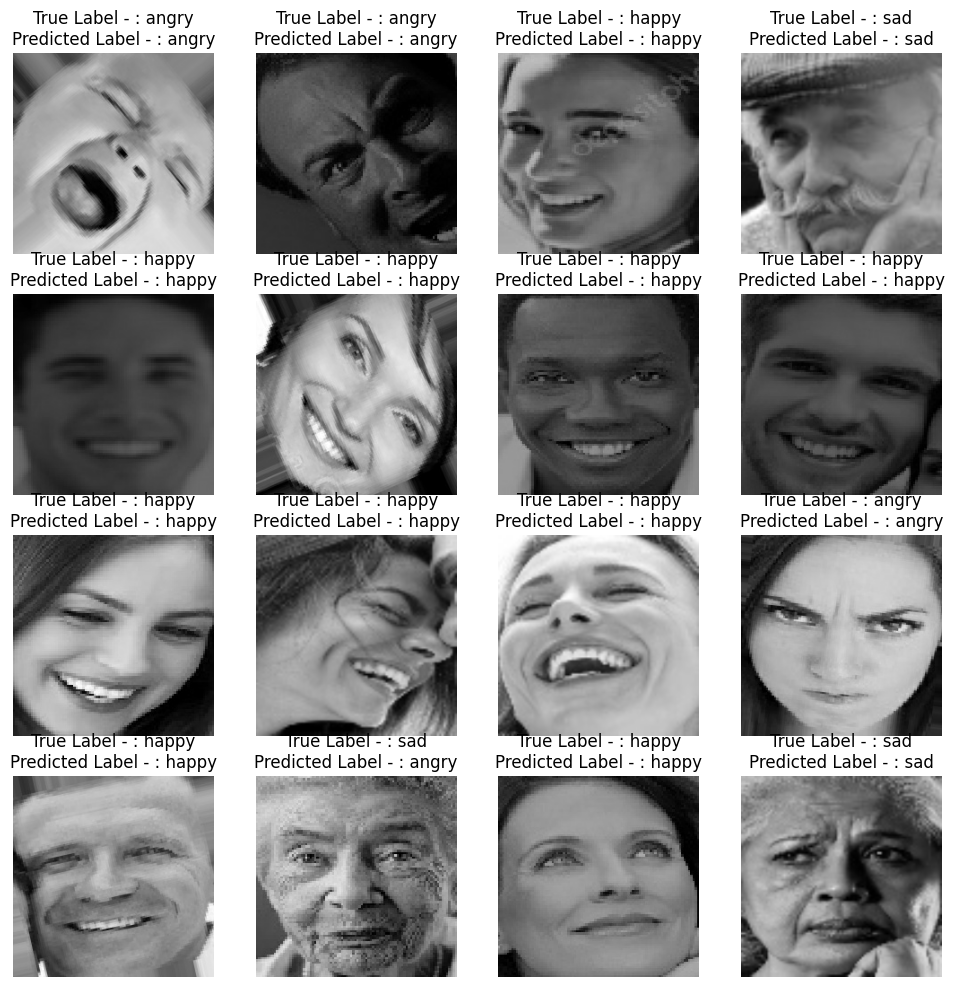

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,12))

for images, labels in test_data.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + config["class_names"][tf.argmax(labels[i], axis = -1).numpy()]
              + "\n" + "Predicted Label - : "
              + config["class_names"][int(tf.argmax(model3(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")


In [38]:
pred_probs=model3.predict(test_data,verbose=1)

72/72 [==============================] - 3s 41ms/step


In [40]:
pred_classes=pred_probs.argmax(axis=1)
len(pred_classes),pred_classes

(2278, array([2, 2, 1, ..., 0, 0, 2]))

In [42]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

len(y_labels)

2278

In [44]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

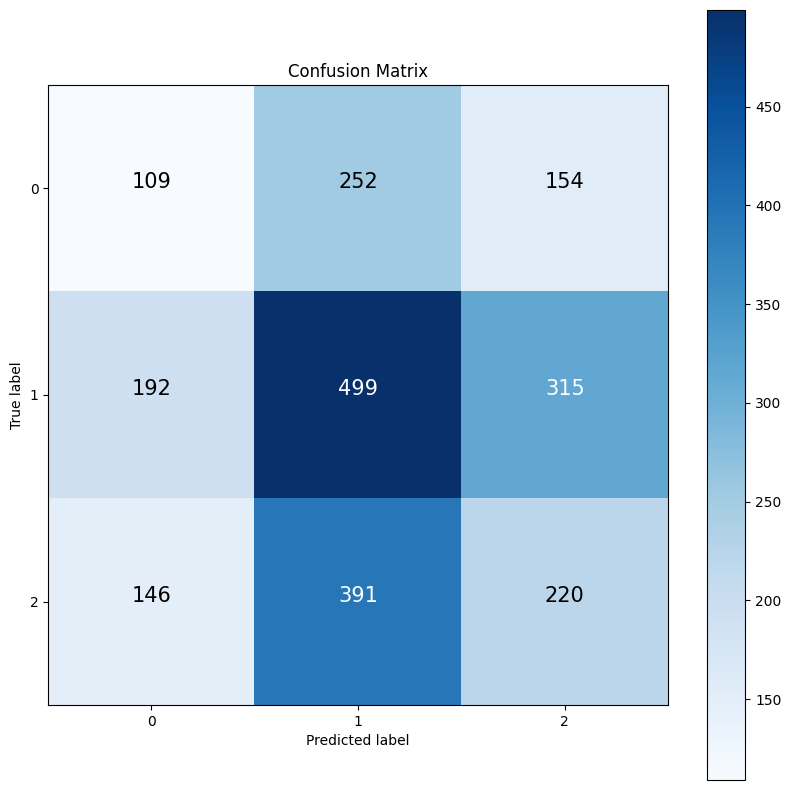

In [45]:
make_confusion_matrix(y_labels,pred_classes)